In [11]:
import gymnasium as gym
from stable_baselines3.common.env_checker import check_env
import numpy as np
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_line


from envs.one_fish import one_fish
from envs.rescale_env import rescale_env
# RL envs work in transformed units
rl_env = one_fish()
env = rescale_env(rl_env)

check_env(rl_env)

def const_esc(obs, esc=0.5, bound=2):
  harvest = np.max([obs - esc, 0])
  effort = harvest / obs
  return(effort)

df = []
episode_reward = 0
observation, _ = env.reset()

for t in range(env.Tmax):
  #effort = env.parameters["r"]/2
  #action = np.array([effort * 2 -1])
  action = const_esc(observation)
  df.append([t, action[0], episode_reward, observation[0]])
  observation, reward, terminated, done, info = env.step(action)
  episode_reward += reward
  if terminated:
    break


cols = ["t","action", "reward", "state"]
df = pd.DataFrame(df, columns = cols)

df["escapement"] = (df.state - df.action * df.state)


/home/vscode/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [13]:
df

,t,action,reward,state,escapement
0,0,0.381690,0.000000,0.808656,0.5
1,1,0.047480,0.308656,0.524923,0.5
2,2,0.057833,0.333579,0.530691,0.5
3,3,0.031941,0.364270,0.516498,0.5
4,4,0.045239,0.380768,0.523691,0.5
...,...,...,...,...,...
195,195,0.027192,5.148524,0.513976,0.5
196,196,0.056755,5.162500,0.530085,0.5
197,197,0.050464,5.192585,0.526573,0.5
198,198,0.043576,5.219157,0.522781,0.5


In [14]:

episode_reward


5.265859005972743

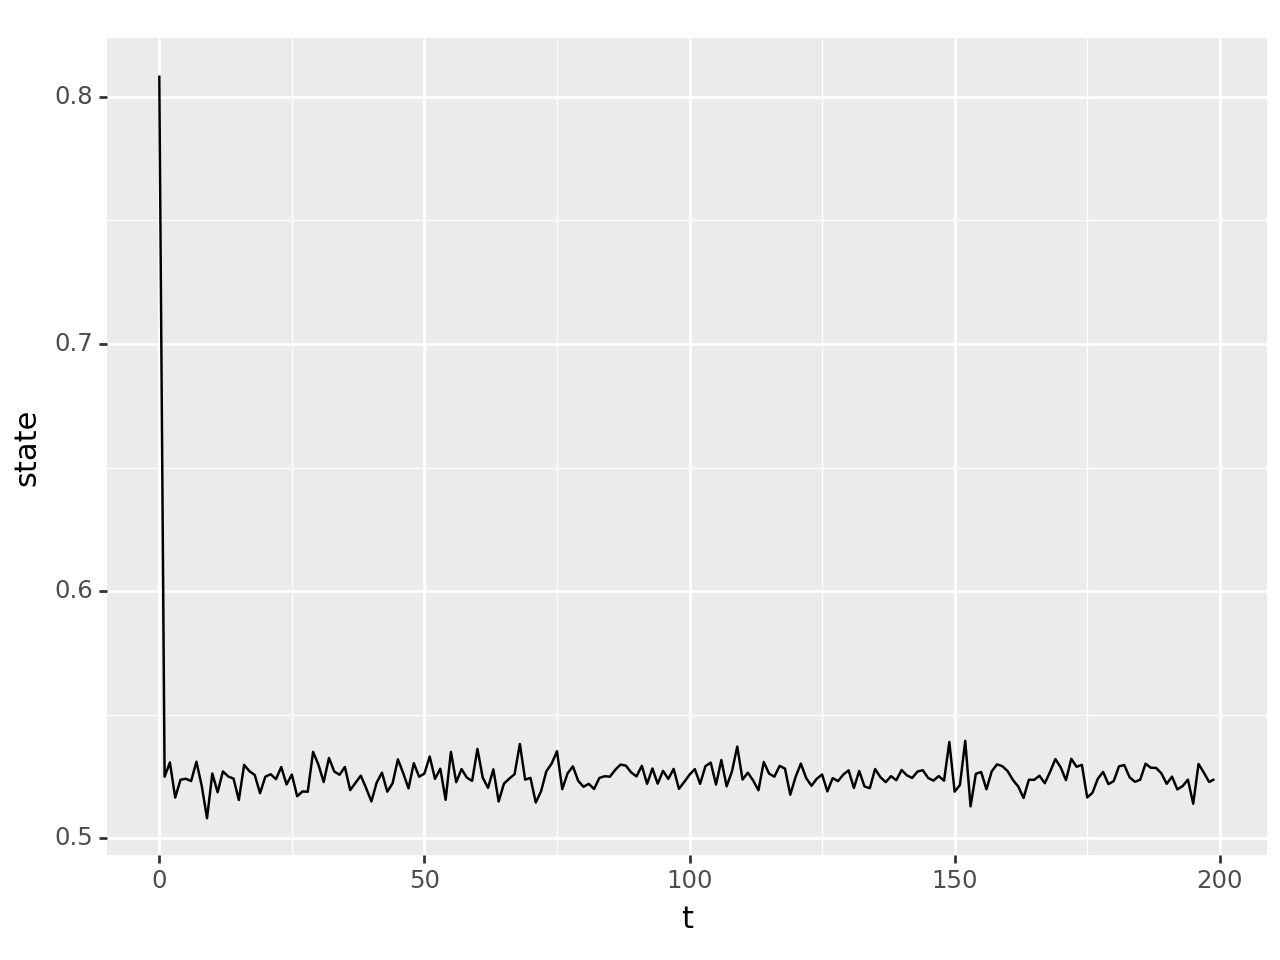

<Figure Size: (640 x 480)>

In [15]:

ggplot(df, aes("t", "state")) + geom_line()


